<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The accuracy of the KNN Model depends on the overlapping of data. The more the data overlap on each other, the less the accuracy the KNN model will have. We can find data overlapping from PCA scatter plot or seaborn pair plot. For densely overlapped data point accuracy increased significantly by increasing the value *n_neighbor*.

In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use('ggplot')

In [ ]:
from google.colab import files
file = files.upload()

Saving datasets_Iris.csv to datasets_Iris.csv


In [ ]:
df = pd.read_csv('datasets_Iris.csv', index_col=0)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Defining Input variables 'X', and targeted output 'y' 

### Converting Categorical Species column to numeric values

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encodedOutput_Y = LabelEncoder()
df['Species'] = encodedOutput_Y.fit_transform(df.iloc[:,-1].values)

In [ ]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2
150,5.9,3.0,5.1,1.8,2


0 -> Iris-setosa
1 -> Iris-versicolor
2 -> Iris-virginica

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


## Distribution of Data in the dataset
How data is distributed in the dataset. Here are more pairplot options.
[sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**hue** has been set to Species without converting numerical values

As we can see in the distribution that the data in the dataset doesn't have much Overlaping except for few. So we can easily apply KNN for this dataset expection much better output.

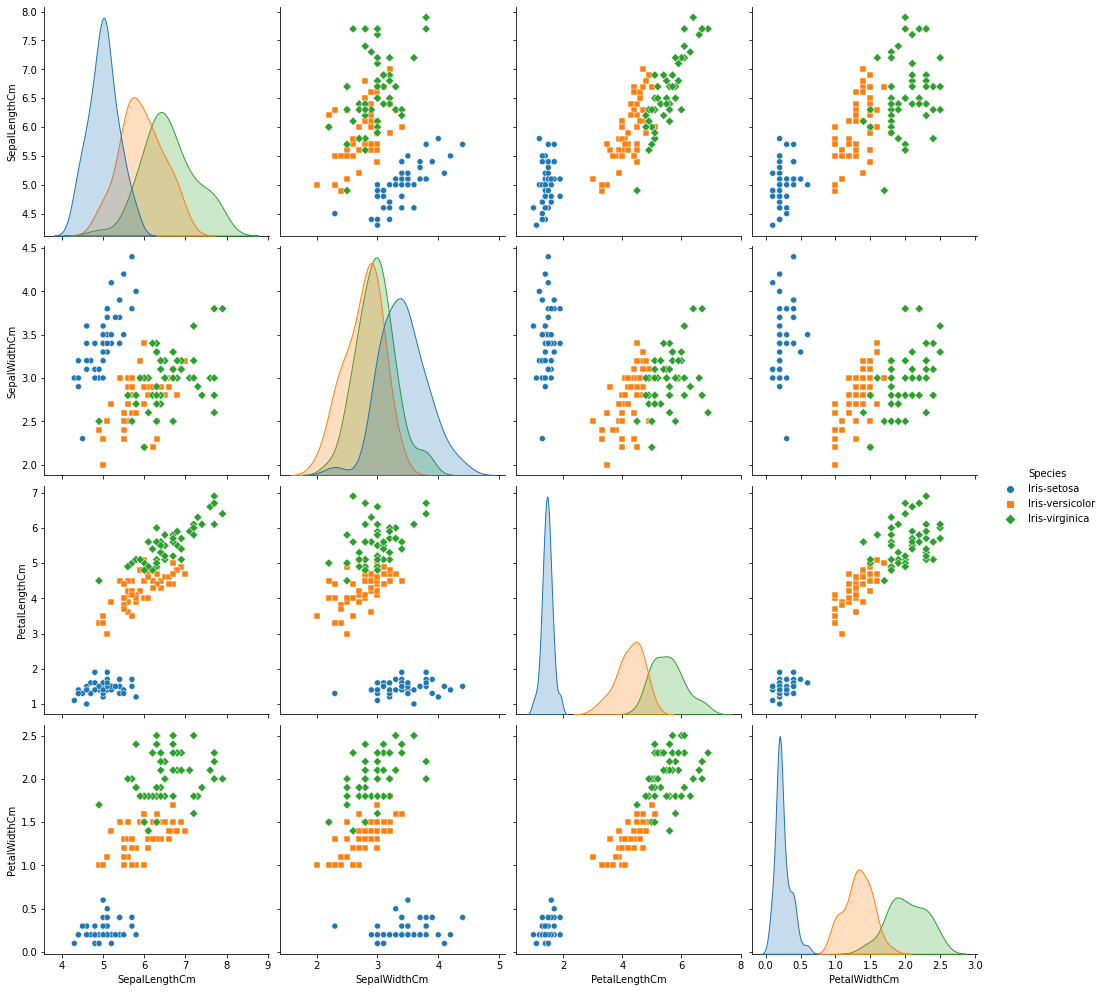

In [ ]:
sns.pairplot(df, hue='Species',  markers=["o", "s", "D"], height=3.5) # hue=y when y datatype is boolean

### Slicing Input variables and targeted output

In [ ]:
numeric_df = df.iloc[:,0:4]

# drop the categorical Species column
# ty=df.drop('Species',axis=1)

# Targeted Output as pandas.Series
# y = df[[df.columns[-1]]]
y = df[df.columns[-1]]

In [ ]:
numeric_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


#### Convering y to 1D numpy array

In [ ]:
y = y.values

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Scaling data for centering the dataset to origin 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(numeric_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data = scaler.transform(numeric_df)

In [ ]:
scaled_data

### Converting scaled data to a dataframe

In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[0:-1])

In [ ]:
X = scaled_df
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Test Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print('Size of Train Data >> ' + str(len(X_train)))
print('Size of Test  >> ' + str(len(X_test)))
print('Size of y Train >> ' + str(len(y_train)))
print('Size of y Test >> ' + str(len(y_test)))

Size of Train Data >> 120
Size of Test  >> 30
Size of y Train >> 120
Size of y Test >> 30


## Using KNN Classifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=33)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

In [56]:
prediction = knn.predict(X_test)

In [57]:
prediction

array([1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 1, 0, 0, 1, 2])

## Testing Accurecy of KNN Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [58]:
conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)
print(conf_matrix.shape)

[[ 8  0  0]
 [ 0  8  2]
 [ 0  2 10]]
(3, 3)


### Plotting Confusion Matrix

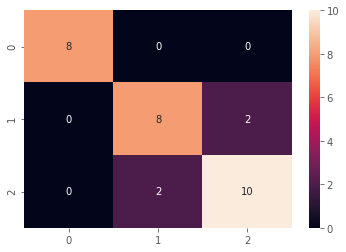

In [59]:
sns.heatmap(conf_matrix, annot=True)

In [60]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      0.80      0.80        10
           2       0.83      0.83      0.83        12

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



### Selecting K value or n_neighbors

In [48]:
accuracy =[]
for num in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=num)
  acc= cross_val_score(knn, X, y, cv=10)
  accuracy.append(1-acc.mean())

In [ ]:
accuracy

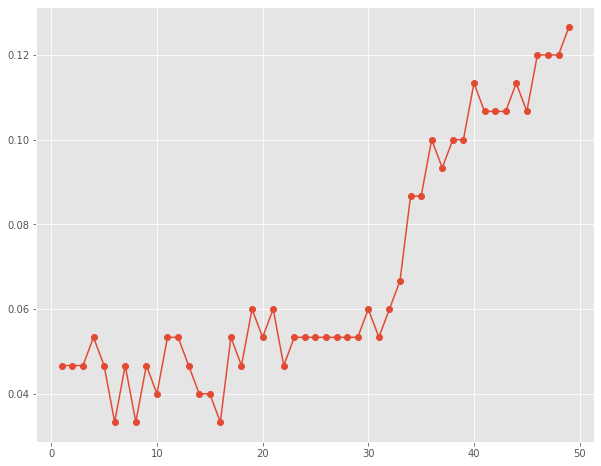

In [53]:
plt.figure(figsize=(10, 8))
plt.plot(range(1,50), accuracy, marker='o')
plt.show()